In [1]:
import os
import sys
import numpy as np


import umap.umap_ as umap

#add the parent folder to sys path so we can import from the notebook subfolder
sys.path.insert(0,'..')


#ALLDIR='/mnt/d/DATA/XFMDATA/2023/Nicholls_Loren/mounts_ansto_230418/230420_qz200um_cut/tiff'
BASEDIR = ""
TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo"
TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2"
EXT='.tiff'

image_directory = os.path.join(BASEDIR, TIFDIR)
#image_directory = ALLDIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2
['/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Al.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-As.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Ca.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Cr.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Cu.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Fe.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-K.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Mg.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3_32um_mod-Mn.tiff', '/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2/r2s3

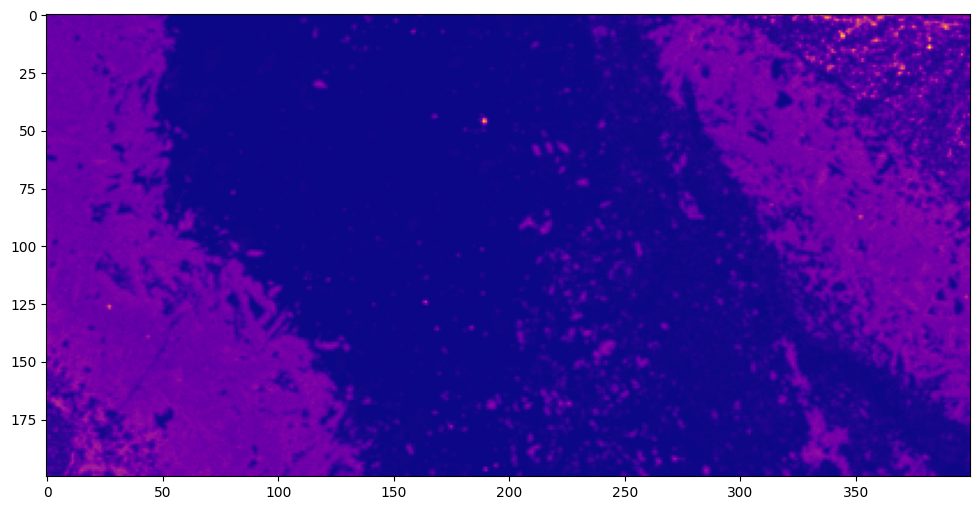

In [12]:
%load_ext autoreload
%autoreload 2

import xfmreadout.processops as processops
import xfmreadout.clustering as clustering
import xfmreadout.visualisations as vis

FORCE_EMBED=True
FORCE_CLUST=True
OVERWRITE=True

data, elements, dims = processops.compile(image_directory, 100, 500, 100, 300)
vis.show_map(data, elements, dims, "Fe")

-----Ni tracker: 0.02085457742214203
LOADING EMBED
CALCULATING CATS
RUNNING CLUSTERING
DBSCAN PARAM 0.1, 0.1
cluster -1, count: 32541
cluster 0, count: 6344
cluster 1, count: 8809
cluster 2, count: 9926
cluster 3, count: 6040
-----Ni tracker: 0.02085457742214203
6
(80000,)
-1
0


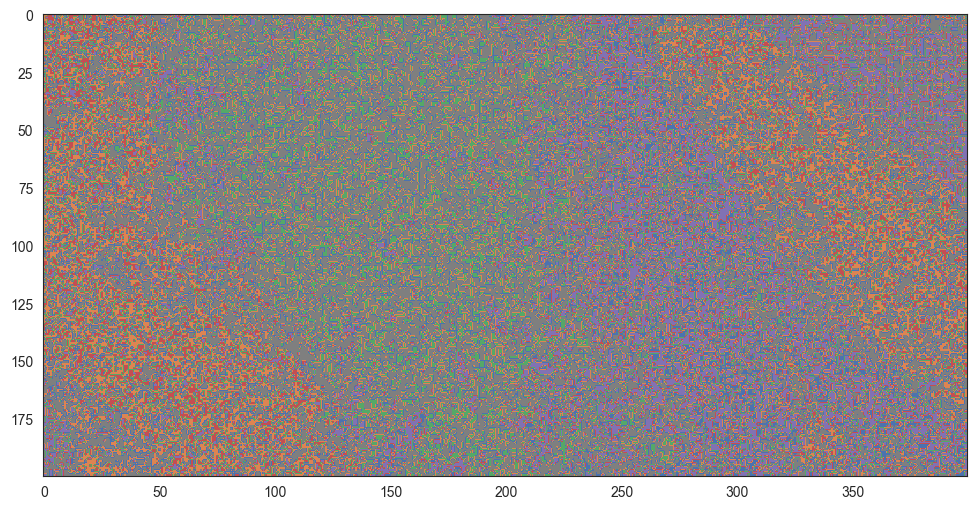

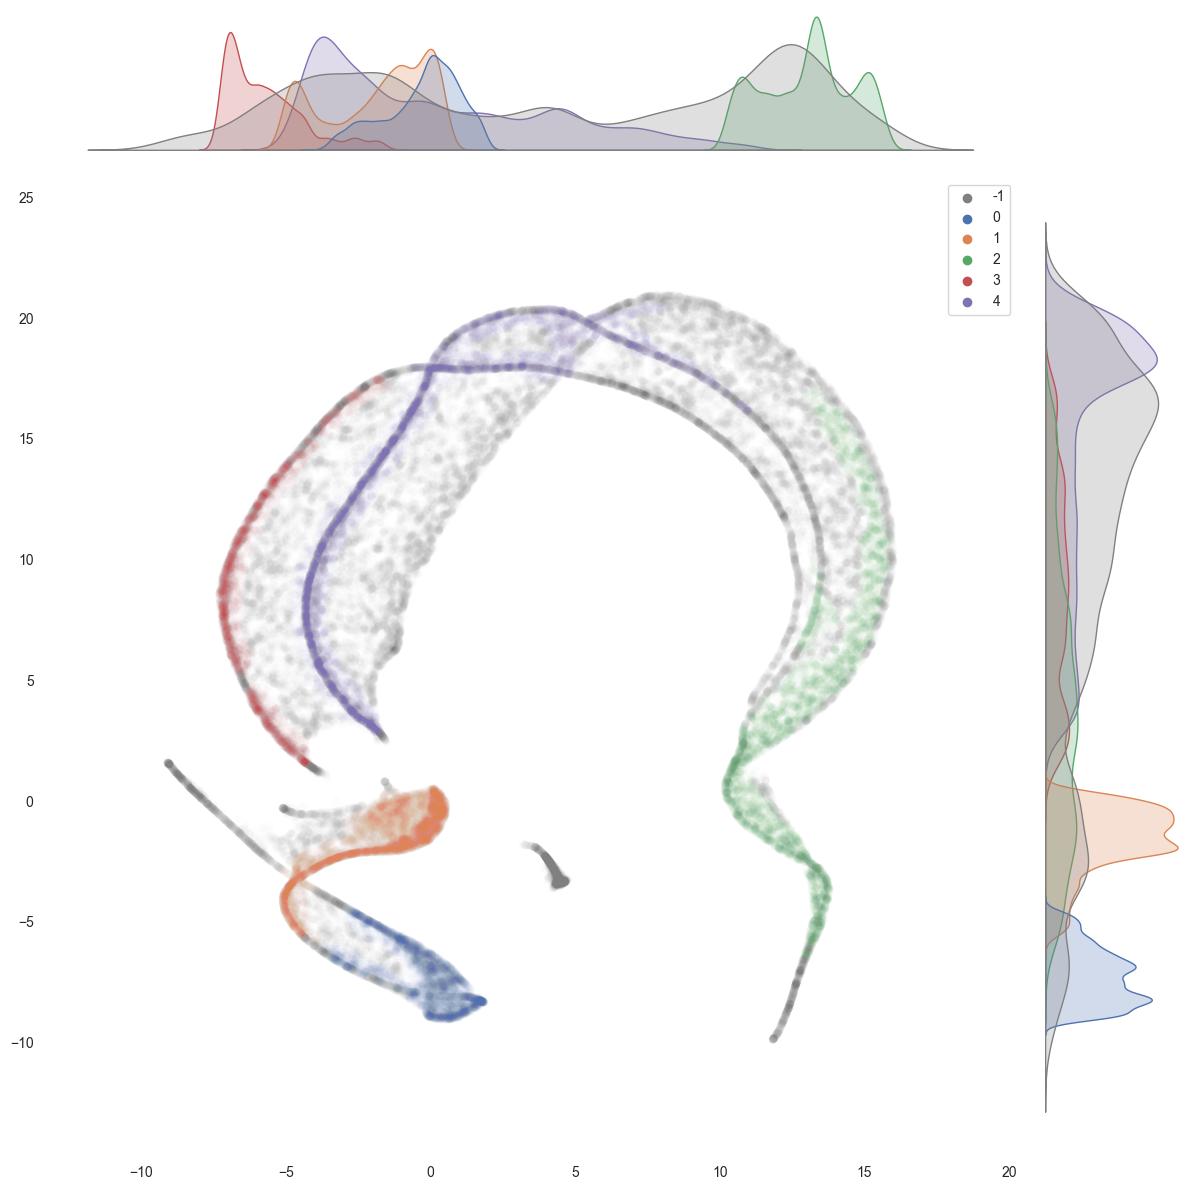

Al, max: 0.03, 98: 0.01, avg: 0.00
As, max: 0.19, 98: 0.02, avg: 0.00
Ca, max: 6.45, 98: 4.61, avg: 1.37
Cr, max: 0.02, 98: 0.00, avg: 0.00
Cu, max: 0.26, 98: 0.01, avg: 0.00
Fe, max: 1.61, 98: 0.42, avg: 0.13
K, max: 1.09, 98: 0.59, avg: 0.04
Mg, max: 0.01, 98: 0.00, avg: 0.00
Mn, max: 0.06, 98: 0.04, avg: 0.01
Na, max: 0.00, 98: 0.00, avg: 0.00
Ni, max: 0.02, 98: 0.01, avg: 0.00
P, max: 6.21, 98: 0.33, avg: 0.06
S, max: 10.66, 98: 6.98, avg: 1.78
Sb, max: 185.00, 98: 80.83, avg: 19.68
Si, max: 0.10, 98: 0.08, avg: 0.03
Sr, max: 0.27, 98: 0.08, avg: 0.02
Ti, max: 2.03, 98: 0.06, avg: 0.00
Y, max: 0.22, 98: 0.04, avg: 0.01
Zn, max: 0.09, 98: 0.01, avg: 0.00
Zr, max: 1.12, 98: 0.32, avg: 0.10


In [14]:

print(f"-----{elements[10]} tracker: {np.max(data[:,10])}")
categories, classavg, embedding, clusttimes, classifier = clustering.run(data, image_directory, force_embed=FORCE_EMBED, force_clust=FORCE_CLUST, overwrite=OVERWRITE)
print(f"-----{elements[10]} tracker: {np.max(data[:,10])}")

palette = vis.plot_clusters(categories, classavg, embedding, dims)

for i in range(len(elements)):
    print(f"{elements[i]}, max: {np.max(data[:,i]):.2f}, 98: {np.quantile(data[:,i],0.98):.2f}, avg: {np.average(data[:,i]):.2f}")





In [17]:
vis.show_map(data,elements, dims, "SbL")
vis.show_map(data,elements, dims, "Fe")

(80000, 20)


TypeError: list indices must be integers or slices, not NoneType

In [6]:
palette

[(0.5, 0.5, 0.5),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411)]